# Regression of Used Car Prices

- **Projet kaggle disponible sur : https://www.kaggle.com/competitions/playground-series-s4e9/**

* **objectif :** L'objectif de ce concours est de **prédire le prix des voitures** d'occasion en fonction de différents attributs.

In [7]:
import numpy as np
import pandas as pd

import missingno as msn  


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer

from scipy.stats import shapiro,kendalltau, mannwhitneyu, kruskal

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler


import os
import warnings
from termcolor import colored

warnings.filterwarnings("ignore")

In [8]:
splitted_path = os.getcwd().split("\\")[:-1]
path_dataset = "\\".join(splitted_path) + "\\dataset\\"

In [9]:
data = pd.read_csv(path_dataset+r"train.csv")
df = data.copy()

### Aperçu jeu de données : 

In [10]:
print("Dimensions :", df.shape)
df.head()

Dimensions : (188533, 13)


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


- A partir du jeu de données nous allons créer notre plan pour la partie EDA :

# Plan : 
## 1. Connaissance du jeu de données:
- Features signification
- Type de target ?
- Type de données ? 
- Données manquantes ?

## 2. Datavisualisation et imputation des données manquantes :
- Imputation des données :
    - Visualisation des variables avec des données manquantes 
    - Imputation
- Analyse univariée
    -  Visualisation des variables numériques (discrète / continues) & test de shapiro (normalité)
    - Visualisation des variables qualitatives 
        - Variables qualitatives à moins de 20 modalités 
        - Variables qualitatives à plus de 20 modalités 
        
- Analyse bivariée : Target Vs features
    - Target vs variables continues
    - Target vs variables qualitatives/discrètes
- Autre visualisation (multivariée, ..)


## 3. Test statistique
- Target vs variable continues
- Target vs variables discretes + qualitatives

## 4. Preprocessing : Standardisation et encodage
### Sur le train : 
- Standardisation
- Encodage
- Enregistrement DF :

### sur le test :
- imputation
- Encodage :
- Standardisation :
- Enregistrement du dataframe


# 1. Connaissance du jeu de données :


In [11]:
print(colored("Répartition du nombre de modalité en fonction du type de variable :\n",attrs=["bold"], color="green"))
print(colored("Variable qualitatives :", attrs=["bold"], color="blue"))
print(df.select_dtypes(exclude="int").nunique(),"\n")
print(colored("Variable numériques :", attrs=["bold"], color="blue"))
print(df.select_dtypes(include="int").nunique())

Répartition du nombre de modalité en fonction du type de variable :

Variable qualitatives :
brand             57
model           1897
fuel_type          7
engine          1117
transmission      52
ext_col          319
int_col          156
accident           2
clean_title        1
dtype: int64 

Variable numériques :
id            188533
model_year        34
milage          6651
price           1569
dtype: int64


In [12]:
print("Aperçu des 5 premières valeurs pour chaque variables",colored("QUALITATIVES","magenta",attrs=["bold"]))
print()
for i in df.select_dtypes(exclude="int"):
    col = df[i]
    print(f'{colored(i,"green",attrs=["bold"])} : {col.unique()[:5]} ({colored(col.nunique(),"red",attrs=["bold"])})\n')

Aperçu des 5 premières valeurs pour chaque variables QUALITATIVES

brand : ['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz'] (57)

model : ['Cooper S Base' 'LS V8' 'Silverado 2500 LT' 'G90 5.0 Ultimate'
 'Metris Base'] (1897)

fuel_type : ['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel'] (7)

engine : ['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel'
 '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability'
 '420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel'
 '208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel'] (1117)

transmission : ['A/T' 'Transmission w/Dual Shift Mode' '7-Speed A/T' '8-Speed A/T'
 '10-Speed Automatic'] (52)

ext_col : ['Yellow' 'Silver' 'Blue' 'Black' 'White'] (319)

int_col : ['Gray' 'Beige' 'Black' '–' 'Blue'] (156)

accident : ['None reported' 'At least 1 accident or damage reported' nan] (2)

clean_title : ['Yes' nan] (1)



In [13]:
print("Aperçu des 5 premières valeurs pour chaque variables",colored("NUMERIQUES","magenta",attrs=["bold"]))
print()
for i in df.select_dtypes(include="int"):
    col = df[i]
    print(f'{colored(i,"green",attrs=["bold"])} : {col.unique()[:5]} ({colored(col.nunique(),"red",attrs=["bold"])})\n')

Aperçu des 5 premières valeurs pour chaque variables NUMERIQUES

id : [0 1 2 3 4] (188533)

model_year : [2007 2002 2017 2021 2018] (34)

milage : [213000 143250 136731  19500   7388] (6651)

price : [ 4200  4999 13900 45000 97500] (1569)



#### Données manquantes :

In [14]:
df.isnull().mean()[df.isnull().mean()>0]*100

fuel_type       2.696080
accident        1.300568
clean_title    11.360876
dtype: float64

## Feature signification :
- **brand :** marque du véhicule 
- **model :** modèle du véhicule
- **model_year :**  année du modèle du véhicule
- **milage :** kilométrage
- **fuel_type :**  type de carburant
- **engine :**  type de moteur
- **transmission :** type de transmission
- **ext_col :** couleur extérieure
- **int_col :** couleur intérieure
- **accident :** information sur d'éventuel accident
- **clean_title :** titre propre, lorsqu'il est présent, cela signifie que l'assureur n'a jamais modifié le statut du véhicule (pas d'accident)
- **price :**  prix
## Type de target  :
- **price**; numériques continues
## Type de données : 
- 9 variables qualitatives qui semblent être **nominales**
- 3 variables numériques (on ne compte pas id); dont 2 **continues** (milage,price) et 1 **discrète** (model_year)
## Données manquantes :
- présentes sur 3 colonnes, avec maximum ~ 10% de données manquante sur une colonne

# 2. Datavisualisation et imputation des données manquantes :
 # Imputation des données :
### Visualisation des variables avec des données manquantes 


In [10]:
col_nan = (df.isnull().mean()[df.isnull().mean()>0]*100).keys().tolist()
col_nan

['fuel_type', 'accident', 'clean_title']

Ce sont 3 variables qualitatives pour lesquelles nous avons des données manquantes

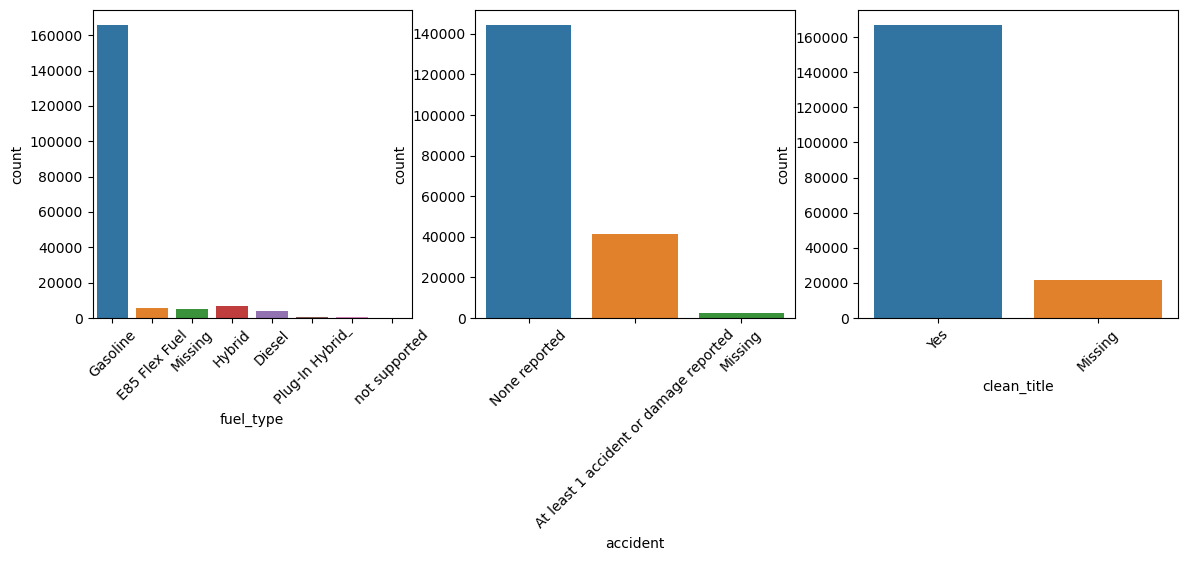

In [11]:
plt.figure(figsize=(14,4))
for i, col in enumerate(col_nan,1):
    plt.subplot(1,3,i)
    ax = sns.countplot(x = col, data = df[col_nan].fillna("Missing"))
    lab = ax.get_xticklabels()
    ax.set_xticklabels(labels=lab, rotation = 45)


In [12]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


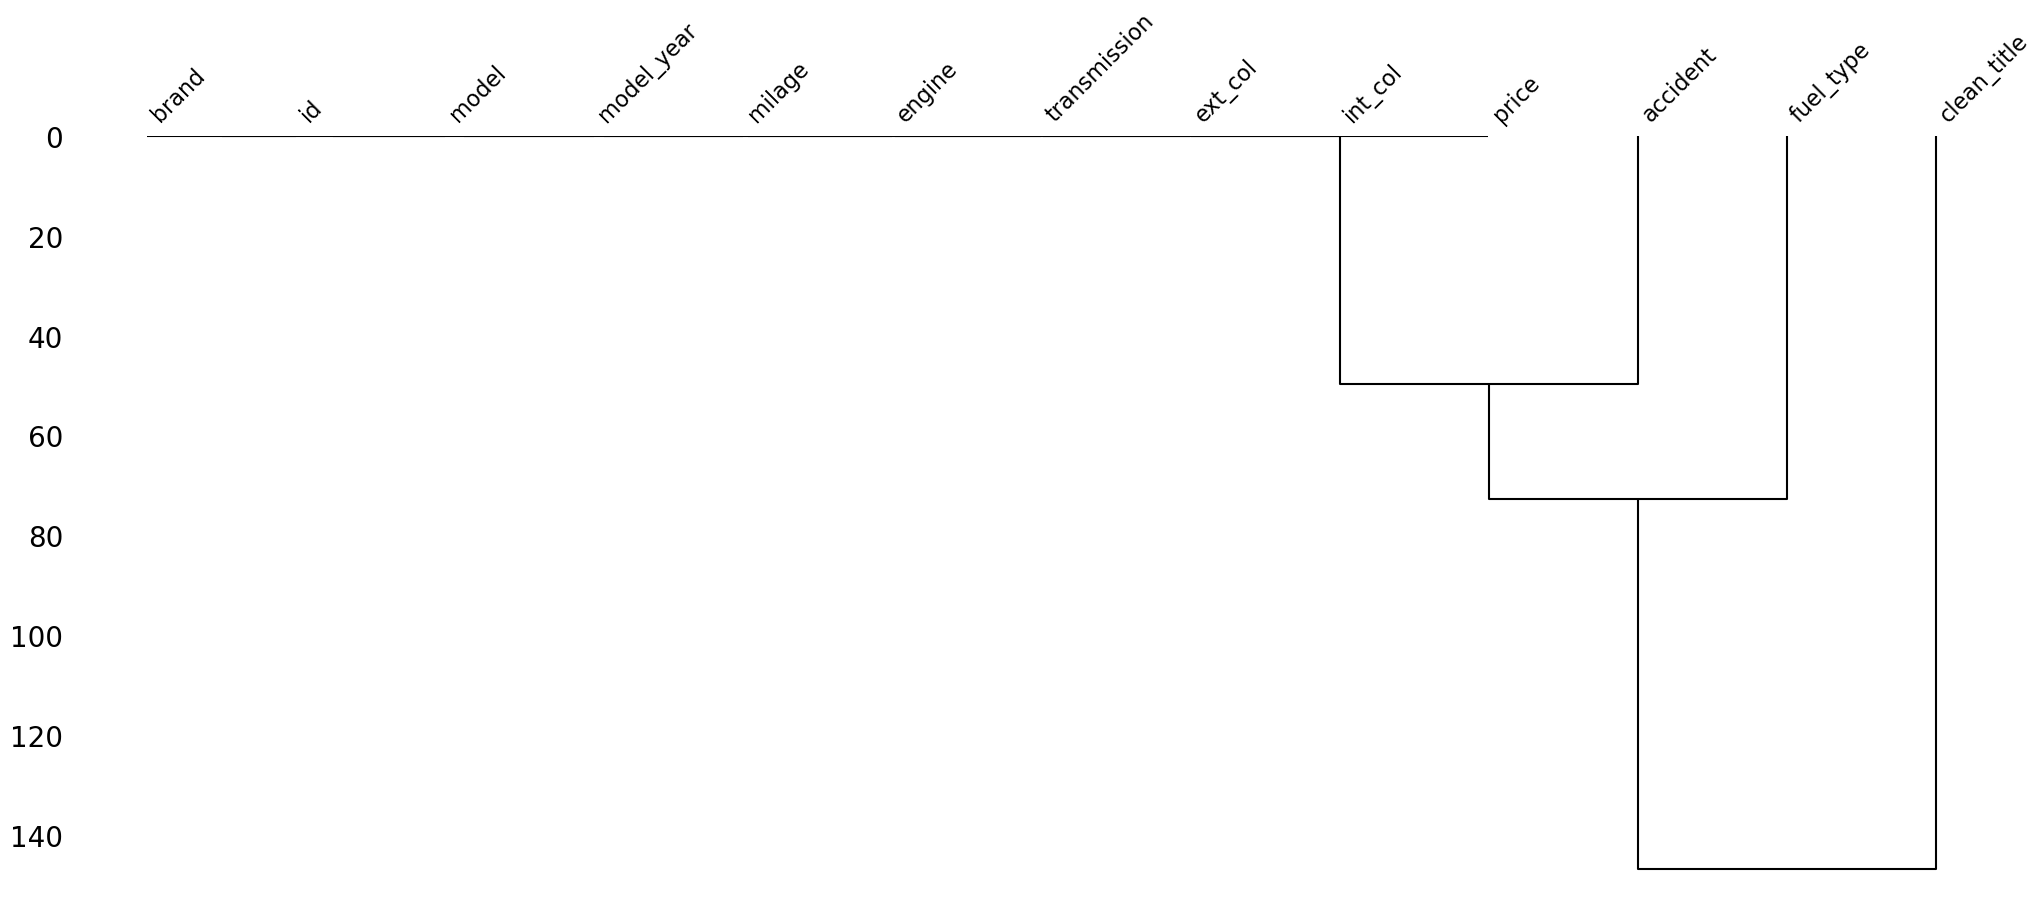

In [13]:
msn.dendrogram(df)
plt.show()

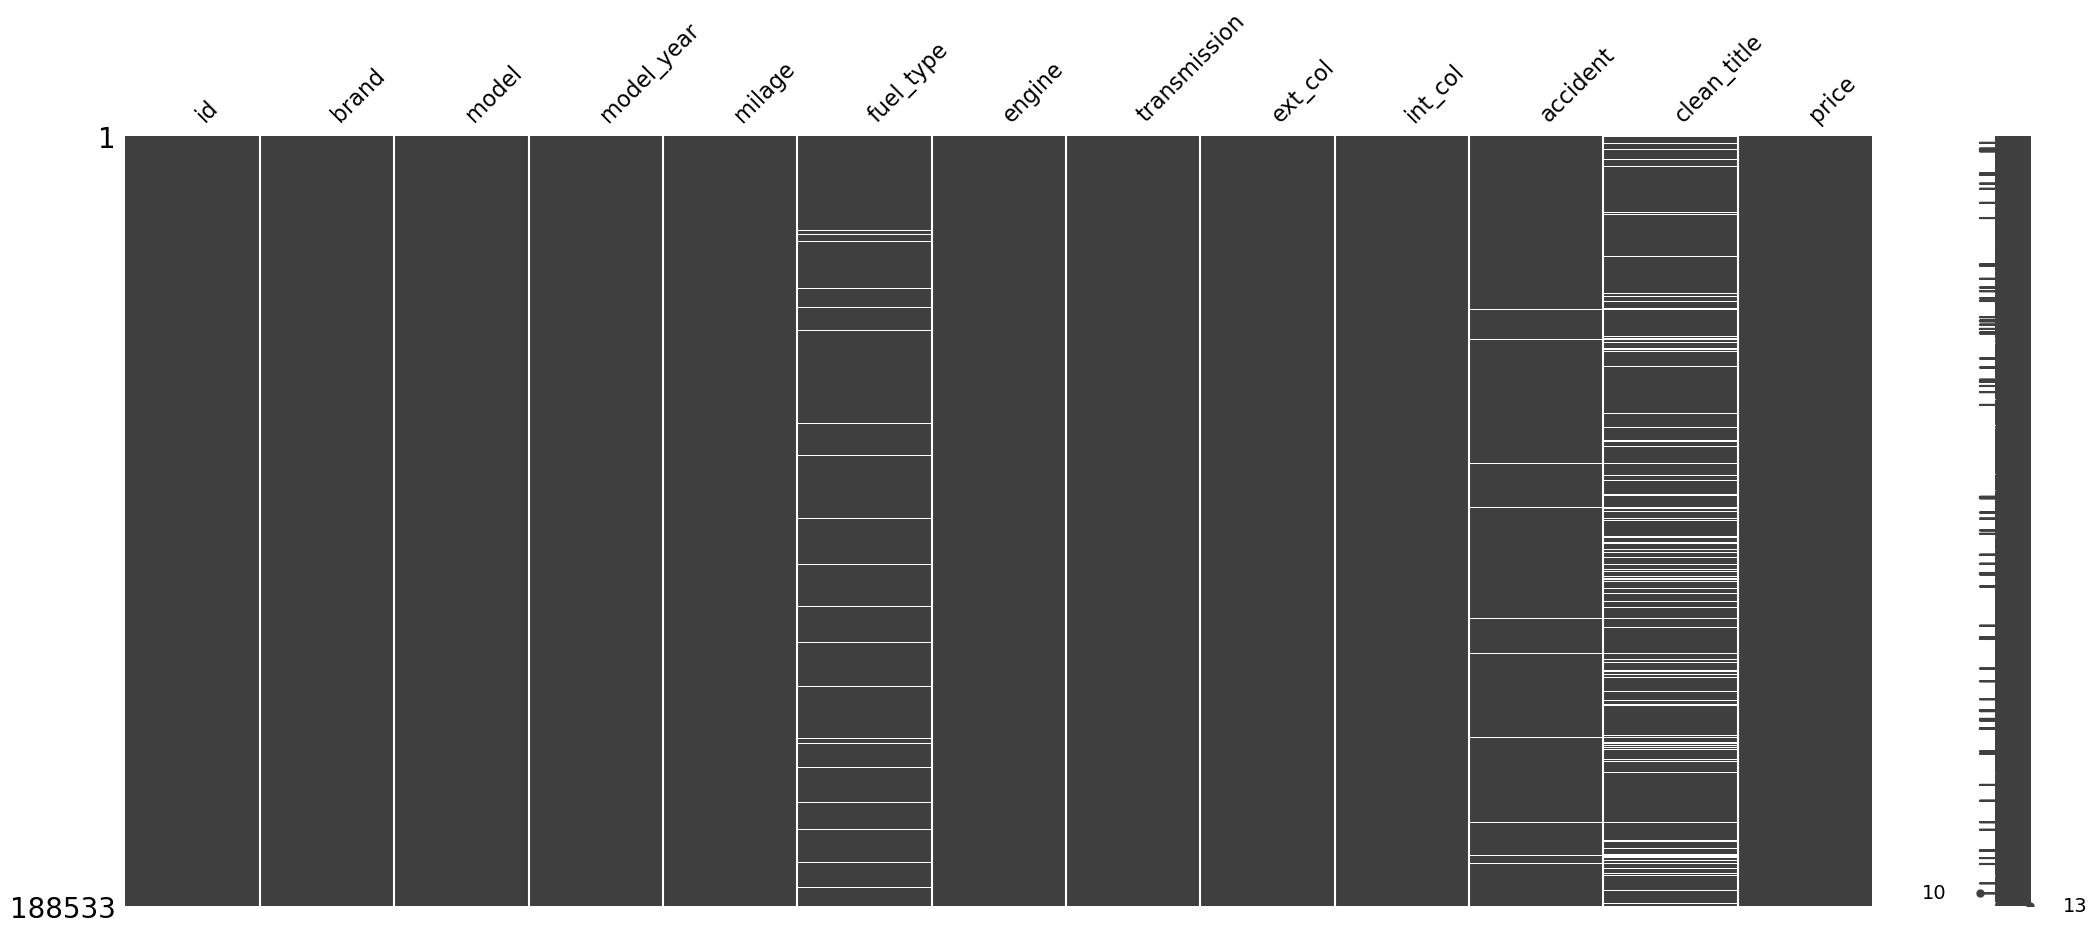

In [14]:
msn.matrix(df)
plt.show()

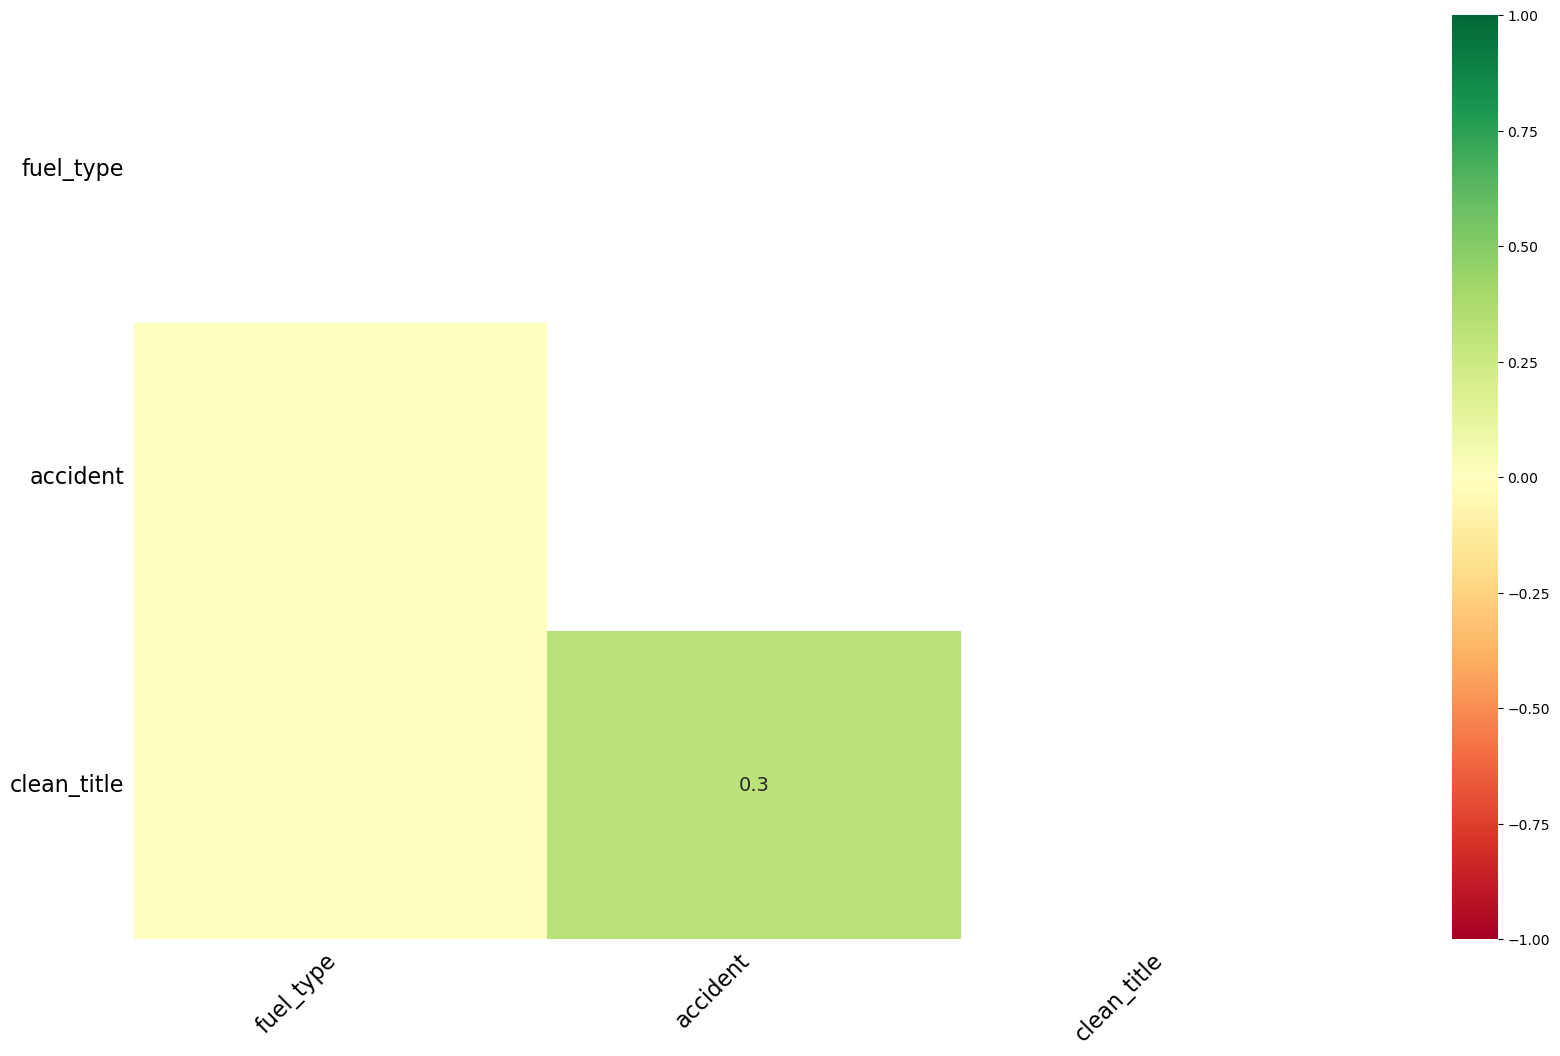

In [15]:
msn.heatmap(df, cmap="RdYlGn")
plt.show()

#### observation :
- fuel_type : Remplaçons par la valeur la plus fréquente
- clean_title : peut être qu'ici le nan signifie simplement l'**du titre propre** du véhicule, et donc remplacer par la valeur Yes n'aurai pas de sens. 

- On peut voir une corrélation entre clean_title et accident


In [15]:
print("Valeurs prises par clean_title :",df.clean_title.unique())
print("Valeurs prises par accident :",df.accident.unique())

Valeurs prises par clean_title : ['Yes' nan]
Valeurs prises par accident : ['None reported' 'At least 1 accident or damage reported' nan]


### Nous allons voir les différents cas de figure possible :

####  Cas 1 : NaN pour clean_title et accident :
- Hypothèse : les observations pour lesquelles nous avons simultanément un NaN pour accident & clean_title pourrait correspondre à un accident et la personne n'a plus son titre propre

#### Cas 2 : Pas de NaN pour clean_title et NaN pour accident :
- Si clean_title = Yes
- Si clean_title = NaN : se référer au cas 1

#### Cas 3 : NaN pour clean_title et pas de NaN pour accident :
- Si accident = None reported :
- Si accident = At least 1 accident or damage reported
- Si accident = NaN : se référer au cas 1


#### Cas 1 : 
- Regardons de plus près les lignes ayant des NaN pour les 2 variables

In [16]:
print("Données manquantes pour le titre de propre du véhicule :")
print(df[df.clean_title.isnull()].shape[0])
print("Données manquantes pour accident ")
print(df[df.accident.isnull()].shape[0])
print("observation simultané entre l'absence du clean_title et accident :")
print(df[df.accident.isnull() & df.clean_title.isnull()].shape[0])

Données manquantes pour le titre de propre du véhicule :
21419
Données manquantes pour accident 
2452
observation simultané entre l'absence du clean_title et accident :
2438


In [17]:
df[df.accident.isnull() & df.clean_title.isnull()].head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
87,87,RAM,2500 Big Horn,2012,95400,Diesel,350.0HP 6.7L Straight 6 Cylinder Engine Diesel...,6-Speed A/T,Black,Black,NaN,NaN,27899
134,134,Jeep,Gladiator Sport,2021,61341,Gasoline,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Firecracker Red Clearcoat,Black,NaN,NaN,32455
164,164,Acura,RDX w/A-Spec Package,2023,39517,Gasoline,2.0 Liter DOHC Turbo,Automatic,Gray,Black,NaN,NaN,29645
333,333,Mercedes-Benz,SLK-Class SLK320,2001,170000,Gasoline,215.0HP 3.2L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Black,Beige,NaN,NaN,6000
361,361,RAM,2500 SLT,2016,69600,Gasoline,410.0HP 6.4L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Gray,NaN,NaN,35900


- Ca ne nous donne pas plus d'indication, mais on peut supposer que la **présence de NaN simultanée** dans **accident** & **clean_title**, on **remplace** le NaN de accident par "**At least 1 accident or damage reported"** 


#### Cas 2 : Pas de NaN pour clean_title et NaN pour accident :

In [18]:
print("Différence entre NaN accident et lignes communes NaN (accident & clean_title) :")
print(df[df.accident.isnull()].shape[0]-df[df.accident.isnull() & df.clean_title.isnull()].shape[0])

Différence entre NaN accident et lignes communes NaN (accident & clean_title) :
14


- Plusieurs infos interessantes :
    - Dans **99%** des cas, lorsqu'il y a un **NaN pour un accident**, **il y a un NaN pour le titre propre du véhicule**
    - Il y a **14 observation** pour lesquelles lorsqu'il y a un NaN pour accident, **il n'y a pas de NaN pour clean_title**



* Observons cela : 

In [19]:
print("observations accident = NaN mais clean_title présent :", data[data.accident.isnull() & ~data.clean_title.isnull()].shape[0])
#(on retrouve bien nos 14 observations)
df[df.accident.isnull() & ~df.clean_title.isnull()].head()
#df[(df.accident.isnull()) & (df.clean_title == "Yes")] Cette ligne permet le même résultat

observations accident = NaN mais clean_title présent : 14


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2060,2060,Lexus,GX 460 Base,2020,48210,Gasoline,4.6 Liter,Automatic,Nebula Gray Pearl,–,NaN,Yes,28825
15226,15226,Audi,A-Class A 220 4MATIC,2019,74725,Gasoline,2.0L I4 16V GDI DOHC,7-Speed Automatic with Auto-Shift,Black,Black,NaN,Yes,36995
68518,68518,Mazda,CX-9 Grand Touring,2021,49528,Gasoline,2.5L I4 16V GDI DOHC Turbo,6-Speed Automatic,Sonic Silver Metallic,Black,NaN,Yes,68495
73560,73560,Tesla,Model Y Long Range,2020,29850,NaN,425.0HP Electric Motor Electric Fuel System,A/T,Red,White,NaN,Yes,24980
79294,79294,Ford,Expedition Limited,2021,23842,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Gray,Medium Stone,NaN,Yes,35113


#### Observation : 
- Comme nous l'avons vu précédemment, clean_title n'a que la valeur "yes" dans le jeu de données ou "NaN"
- Donc ici, il est clair que, nous n'avons pas d'information sur l'accident **mais sur le titre propre qui est présent**, si le titre propre est présent, cela signifie que **le véhicule n'a jamais eu d'accident**; par conséquent, on peut **remplacer** les données manquantes de accident par "None reported"



#### Cas 3 : NaN pour clean_title et pas de NaN pour accident :
- Si accident = None reported :
- Si accident = At least 1 accident or damage reported
- Si accident = NaN : se référer au cas 1

In [20]:
df[(df.accident == df.accident.unique()[0] )& (df.clean_title.isnull())].head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
20,20,Land,Rover Defender S,2023,7978,Gasoline,5.2L V10 40V PDI DOHC,8-Speed Automatic,Santorini Black Metallic,Black,None reported,NaN,41998
45,45,RAM,1500 Laramie,2022,27352,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Diamond Black,Black,None reported,NaN,42599
51,51,Tesla,Model 3 Long Range,2020,38360,NaN,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
70,70,McLaren,570S Spider,2023,3254,Gasoline,3.8L V8 32V MPFI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,Vega Blue,Black,None reported,NaN,92500
72,72,Toyota,Sequoia Platinum,2023,2958,Hybrid,3.4L V6 24V PDI DOHC Twin Turbo Hybrid,Automatic,Green,Boulder,None reported,NaN,65998


#### Observation :
- Si pas d'accident reporté, on peut pensé que clean_title sera "Yes"

In [21]:
df[(df.accident == df.accident.unique()[1] )& (df.clean_title.isnull())].head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
60,60,Mercedes-Benz,GLS 450 Base 4MATIC,2017,44147,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,9-Speed Automatic,White,Parchment.,At least 1 accident or damage reported,NaN,29999
122,122,Acura,TLX,2020,60854,Gasoline,2.0 Liter DOHC Turbo,Automatic,Platinum White Pearl,Ebony,At least 1 accident or damage reported,NaN,19425
256,256,BMW,840 Gran Coupe i xDrive,2020,29336,Gasoline,3.0 Liter Turbo,Automatic,Black Sapphire Metallic,Black,At least 1 accident or damage reported,NaN,50658
284,284,Subaru,Outback Limited XT,2020,39948,Gasoline,2.5L H4 16V MPFI DOHC,Automatic CVT,Magnetite Gray Metallic,Black,At least 1 accident or damage reported,NaN,24590
643,643,Toyota,Tundra Limited,2020,61494,Hybrid,3.4L V6 24V PDI DOHC Twin Turbo Hybrid,Automatic,Midnight Black Metallic,Black,At least 1 accident or damage reported,NaN,34084


#### Observation :
- Si au moins un accident reporté on peut pensé que clean_title sera "No"

- Toutes les lignes contenant des NaN uniquement pour clean_title seront **remplacés** par **"No"**
    
### Imputation :
#### accident & clean_title :
Nous allons créer une fonction qui va imputer les données selon les différents cas de figure que nous avons reporté :

In [22]:
def imputer_accident_title(dataframe):
    modalite_accident = dataframe["accident"].unique()
    
    #Cas 1 : ligne commune NaN accident & clean_title :
    index_cas1 = dataframe[dataframe.accident.isnull() & dataframe.clean_title.isnull()].index #recuperation index
    dataframe.loc[index_cas1, "accident"] = modalite_accident[1] #remplacement par 'At least 1 accident or damage reported'
    
    #Cas 2 : NaN pour accident et non NaN pour clean_title
    #comme clean_title ne prend que la valeur "yes" 
    index_cas2=dataframe[dataframe.accident.isnull() & ~dataframe.clean_title.isnull()].index
    dataframe.loc[index_cas2,"accident"] = modalite_accident[0]

    
    #Cas 3 : non NaN pour accident et NaN pour clean title

    #Si accident = None reported
    index_cas3_1 = dataframe[(dataframe.accident == modalite_accident[0] )& (dataframe.clean_title.isnull())].index
    dataframe.loc[index_cas3_1,"clean_title"] = "Yes"

    #Si accident = At least 1 accident or damage reported
    index_cas3_2 = dataframe[(dataframe.accident == modalite_accident[1] )& (dataframe.clean_title.isnull())].index
    dataframe.loc[index_cas3_2,"clean_title"] = "No"

    return dataframe

In [23]:
# imputons les données avec la fonction :
df = imputer_accident_title(df)
df.isnull().sum()[df.isnull().sum()>0]
#changement a bien ete effectué

fuel_type    5083
dtype: int64

#### fuel_type
- Pour cette derniere feature, nous allons simplement remplacé par le mode :

In [24]:
imputer = SimpleImputer(strategy="most_frequent")
df[["fuel_type"]] = imputer.fit_transform(df[["fuel_type"]])

In [25]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

il n'y a plus de données manquantes

## Analyse univariée :
###  Visualisation des variables numériques (discrète / continues) & test de shapiro (normalité)


In [26]:
target = df.price #récupération de la target
var_cont = [i for i in df.select_dtypes("int").columns.tolist() if i!= "id"] #colonne numérique sauf id
var_qual = [i for i in df if i not in (var_cont) and i != "id"] #récupération des colonnes qualitatives

In [27]:
#Vérifions qu'il ne manque pas de colonne :
len(df.columns) == len(var_cont)+len(var_qual)+1 #1 pour la colonne id

True

In [28]:
def shapiro_test(list_col):
    """
    Cette fonction teste si list_col est une liste, si ce n'est pas le cas,
    elle convertie le texte en une liste avant de faire un test shapiro pour vérifier
    si la feature suit une loi normale ou non
    """
    if type(list_col) != list:
        list_col = [list_col]

    accepted,rejected = [], []

    for col in df[list_col]:
        stat, p_value = shapiro(df[col])  
        alpha = 0.05
        if p_value > alpha: 
            result = colored('Accepter', 'green')  
            accepted.append(col)
        else:
            result = colored('Rejet','red')        
            rejected.append(col)

        print(f'{col:-<50}\t Hypothèse: {result}')
    return accepted,rejected

In [29]:
def visualisation_plot(columns, nrow,ncol):
    plt.figure(figsize=(12,6))
    for i, column in enumerate(list(df[columns].columns), 1):
        plt.subplot(nrow,ncol,i)
        ax=sns.histplot(x=column,data=df,kde=True,color="orange")
        ax.axvline(df[column].mean(), c = "red", label = "Moyenne")
        ax.axvline(df[column].median(), c = "yellow", label = "Mediane")
        ax.legend()

    plt.show()

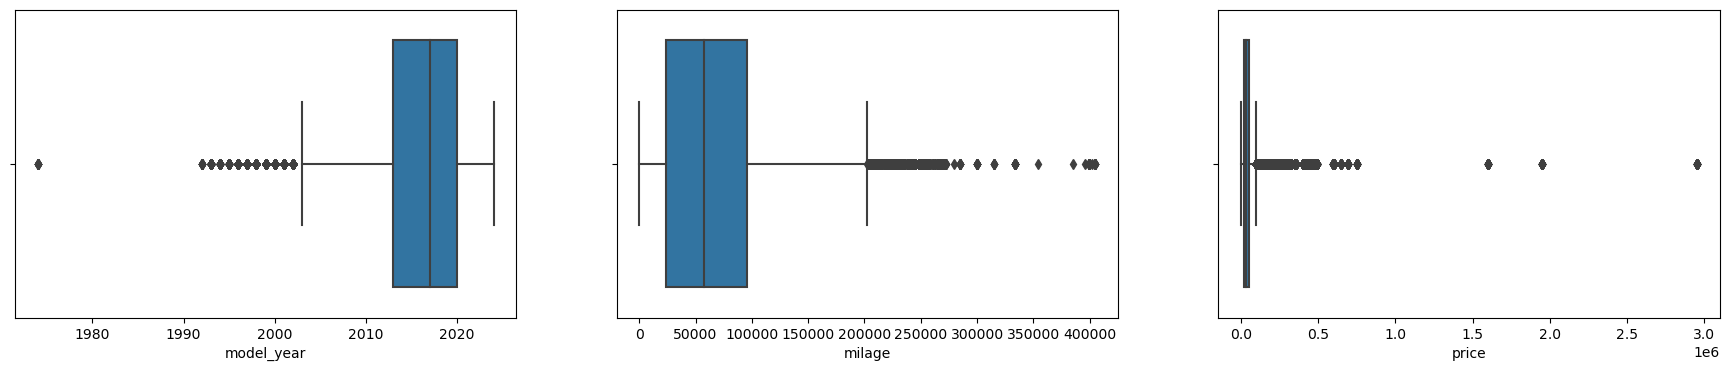

In [31]:
plt.figure(figsize=(22,4))
for i,col in enumerate(var_cont,1):
    plt.subplot(1,3,i)
    sns.boxplot(x=col, data = df[var_cont])

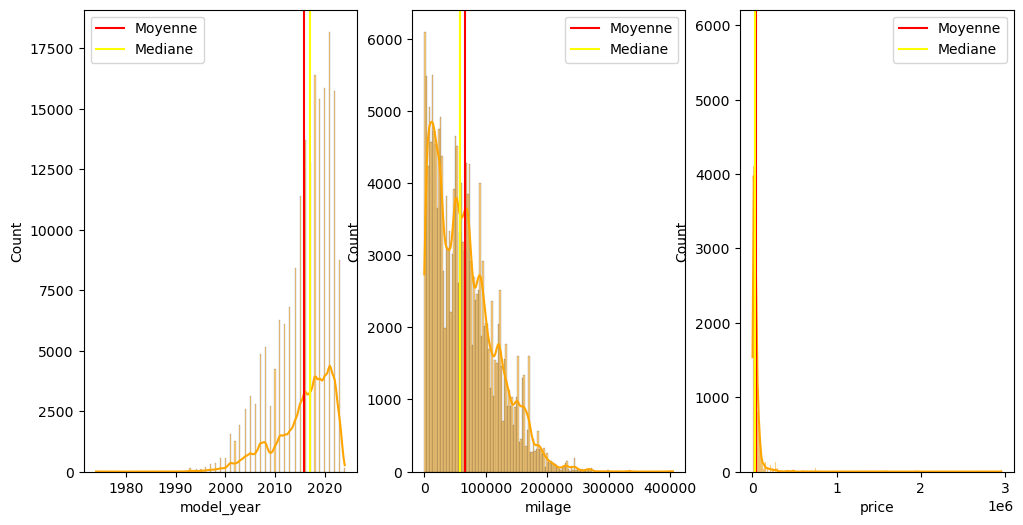

model_year    -1.044511
milage         0.895062
price         20.268453
dtype: float64


In [258]:
visualisation_plot(var_cont,1,3)
print(df[var_cont].skew())

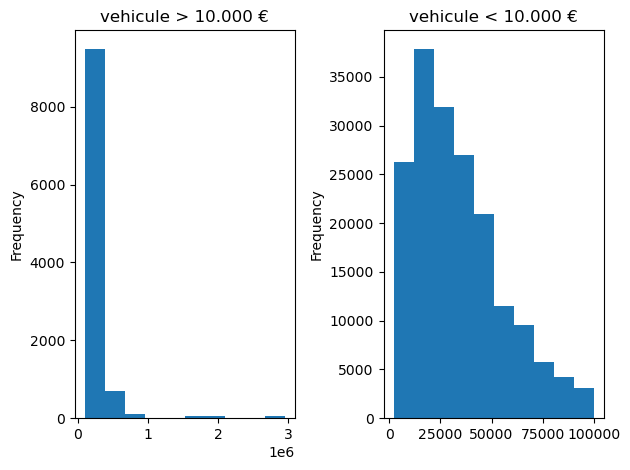

In [319]:
plt.subplot(1,2,1)
df.loc[df.price>10**5,"price"].plot(kind="hist")
plt.title("vehicule > 10.000 €")
plt.subplot(1,2,2)
df.loc[df.price<10**5,"price"].plot(kind="hist")
plt.title("vehicule < 10.000 €")

plt.tight_layout()


In [30]:
print("valeurs moyenne :")
print(df[var_cont].mean())

valeurs moyenne :
model_year     2015.829998
milage        65705.295174
price         43878.016178
dtype: float64


In [31]:
a,r = shapiro_test(var_cont)

model_year----------------------------------------	 Hypothèse: Rejet
milage--------------------------------------------	 Hypothèse: Rejet
price---------------------------------------------	 Hypothèse: Rejet


### Observation :
- model_year : véhicule année 2015 en moyenne, allant des année 70 a 2020+; asymétrie négative (queue étalée a gauche), avec la moyenne<mediane<mode) et donc nous aurons plus de véhicule récent (>2015) dans les données
- milage : a l'inverse ici, la queue est étalée a droite avec une asymétrie (légèrement) positive, un kilométrage moyen de 65.000, on peut observer beaucoup de véhicule avec un kilométrage relativement faible (ce qui est logique car beaucoup de véhicule récent)
- price : prix moyen de 43.878 €; on peut noter une skew >> 0, a cause de certains véhicule très onéreux qui étirent les données à droite

Les features ne suivent pas de loi normale

#### Bilan
- Nous avons des véhicule globalement récent (> année 2015),  avec des valeurs de kilométrage moyennement faible , avec une grande majorité de véhicule inférieur a 10.000 €

## Visualisation des variables qualitatives :
### Variables qualitatives à moins de 20 modalités :

In [32]:
def discret_plot_viz(columns,nrow,ncol):
    plt.figure(figsize=(14,10))
    for i, column in enumerate(list(df[columns].columns), 1):
        plt.subplot(nrow,ncol,i)
        ax=sns.countplot(y=column,data=df, )
    plt.show()

In [33]:
#récupérons les variable qualitative sans trop de modalité : 
var_qual_low = df[var_qual].nunique()[df[var_qual].nunique()<20].keys().tolist()

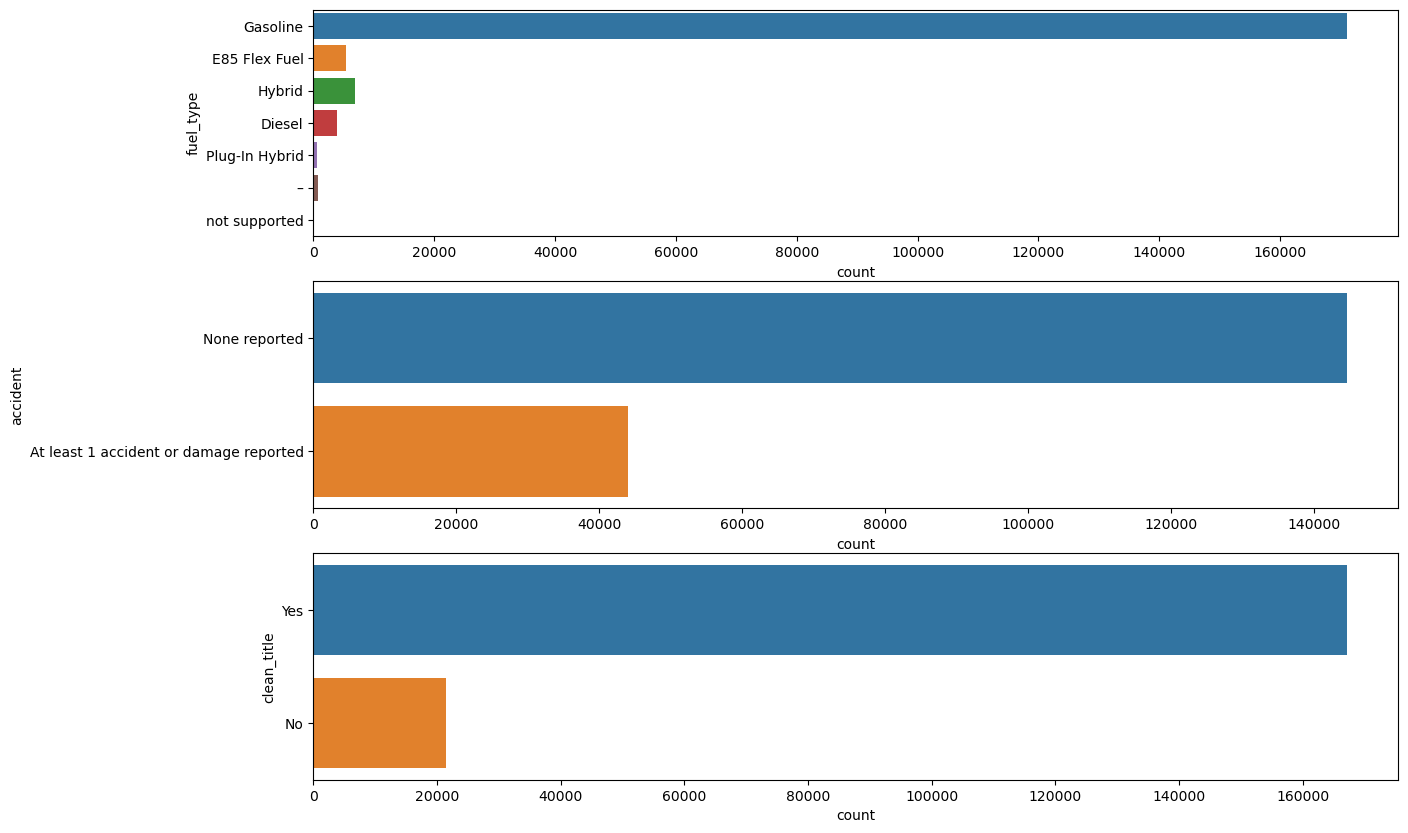

In [336]:
discret_plot_viz(var_qual_low,3,1)

## Variables qualitatives à plus de 20 modalités :
- Pour les features avec trop de modalité, nous allons récupérer simplement les 15 valeurs les plus représentées :


In [34]:
#features ayant plus de 20 modalités :
var_qual_high = [i for i in var_qual if i not in var_qual_low]
#dictionnaire contenant nom_features : 15 première modalités les plus représentées
dict_val_count = {}
for i in var_qual_high:
    col = df[i]
    dict_val_count[i] = col.value_counts().sort_values(ascending=False)[:15]

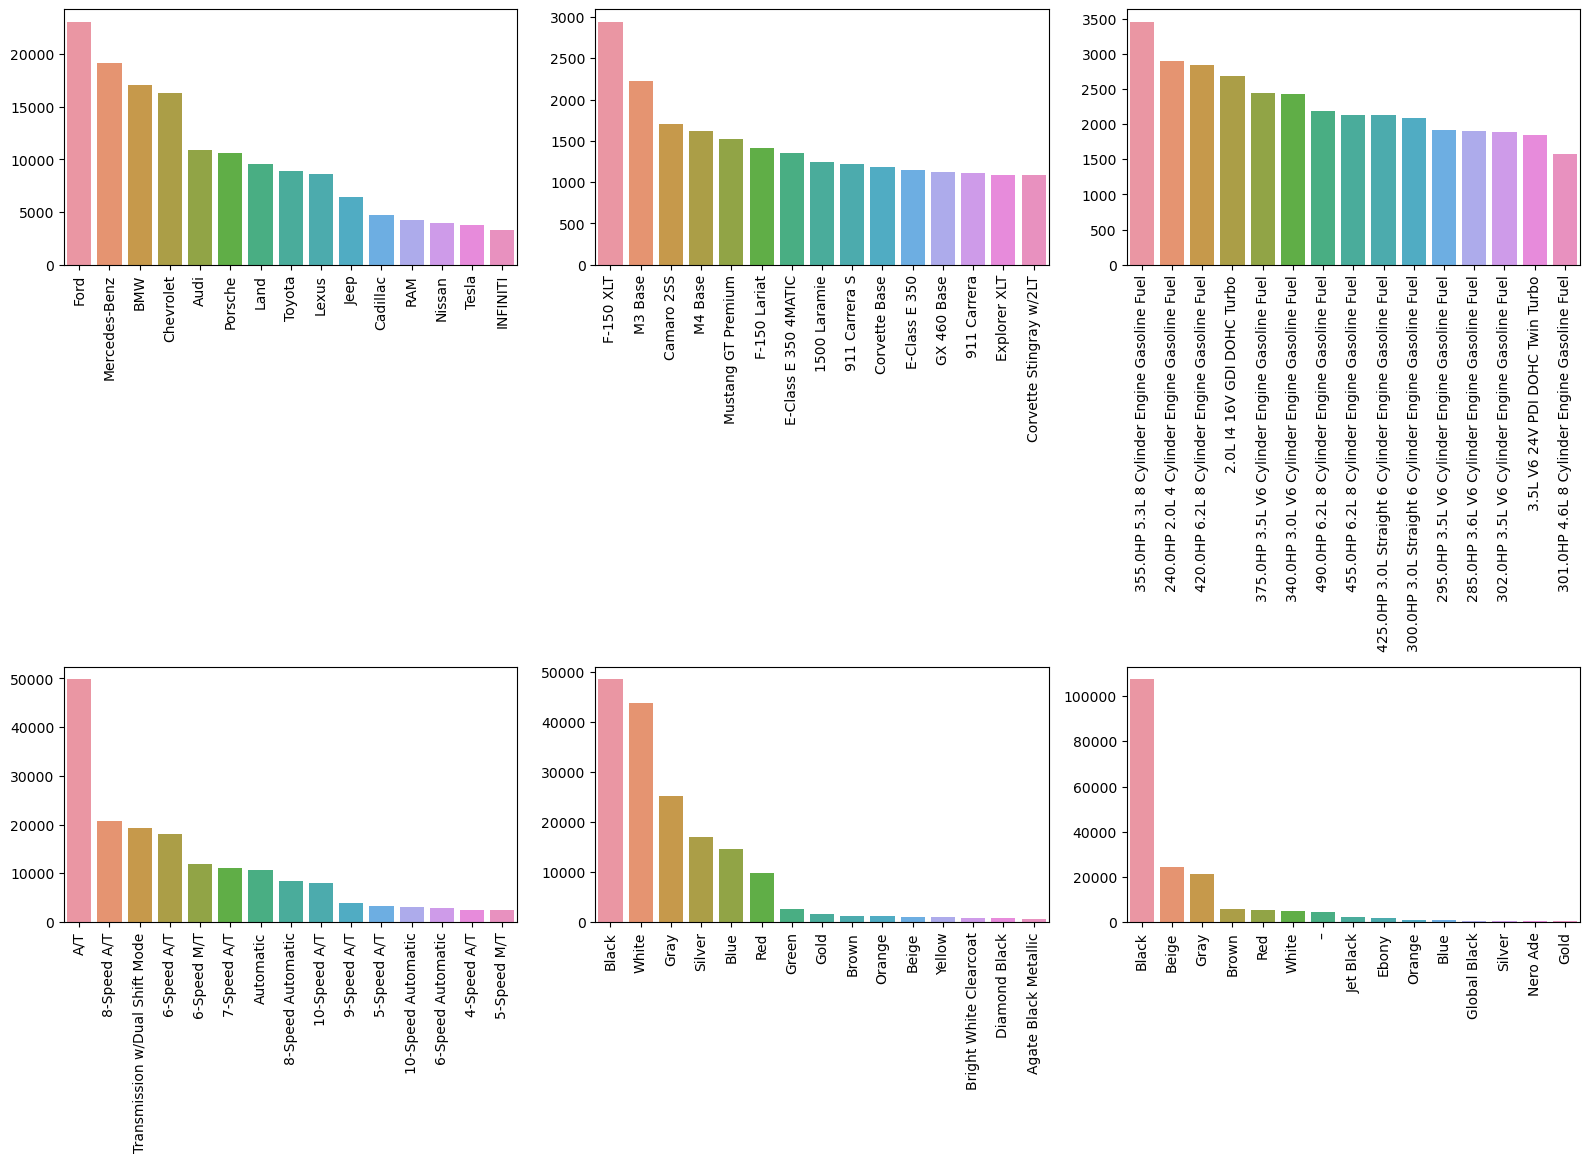

In [393]:
plt.figure(figsize=(16,16))
for i,col in enumerate(dict_val_count,1):
    plt.subplot(3,3,i)
    ax = sns.barplot(x = dict_val_count[col].keys().tolist(), y = dict_val_count[col].values)
    lab = ax.get_xticklabels()
    ax.set_xticklabels(rotation=90, labels = lab)
plt.tight_layout()
plt.show()

# Analyse bivariée : Target Vs features
## Target vs variables continues


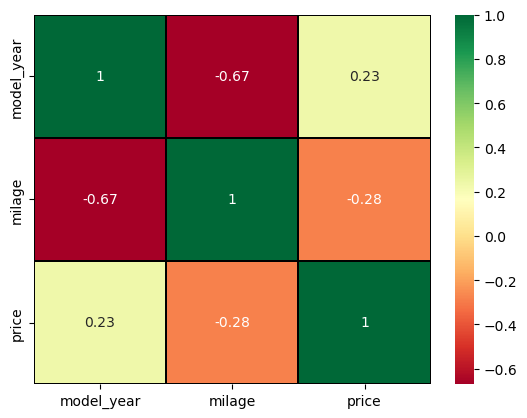

In [428]:
sns.heatmap(
    df[var_cont].corr(), annot=True, 
    cmap = "RdYlGn",linewidths=.1, linecolor="black"
           )
plt.show()

### Observation : 
- anticorrélation entre le kilométrage et le prix : plus une voiture a un été utilisé et moins sont prix est élevé
- anti corrélation + prononcé entre le kilométrage et l'année du véhicule : plus un véhicule est ancien et plus les valeurs de kilométrage sont élevées

## Target vs variables qualitatives/discrètes
### Variable avec peu de modalité :

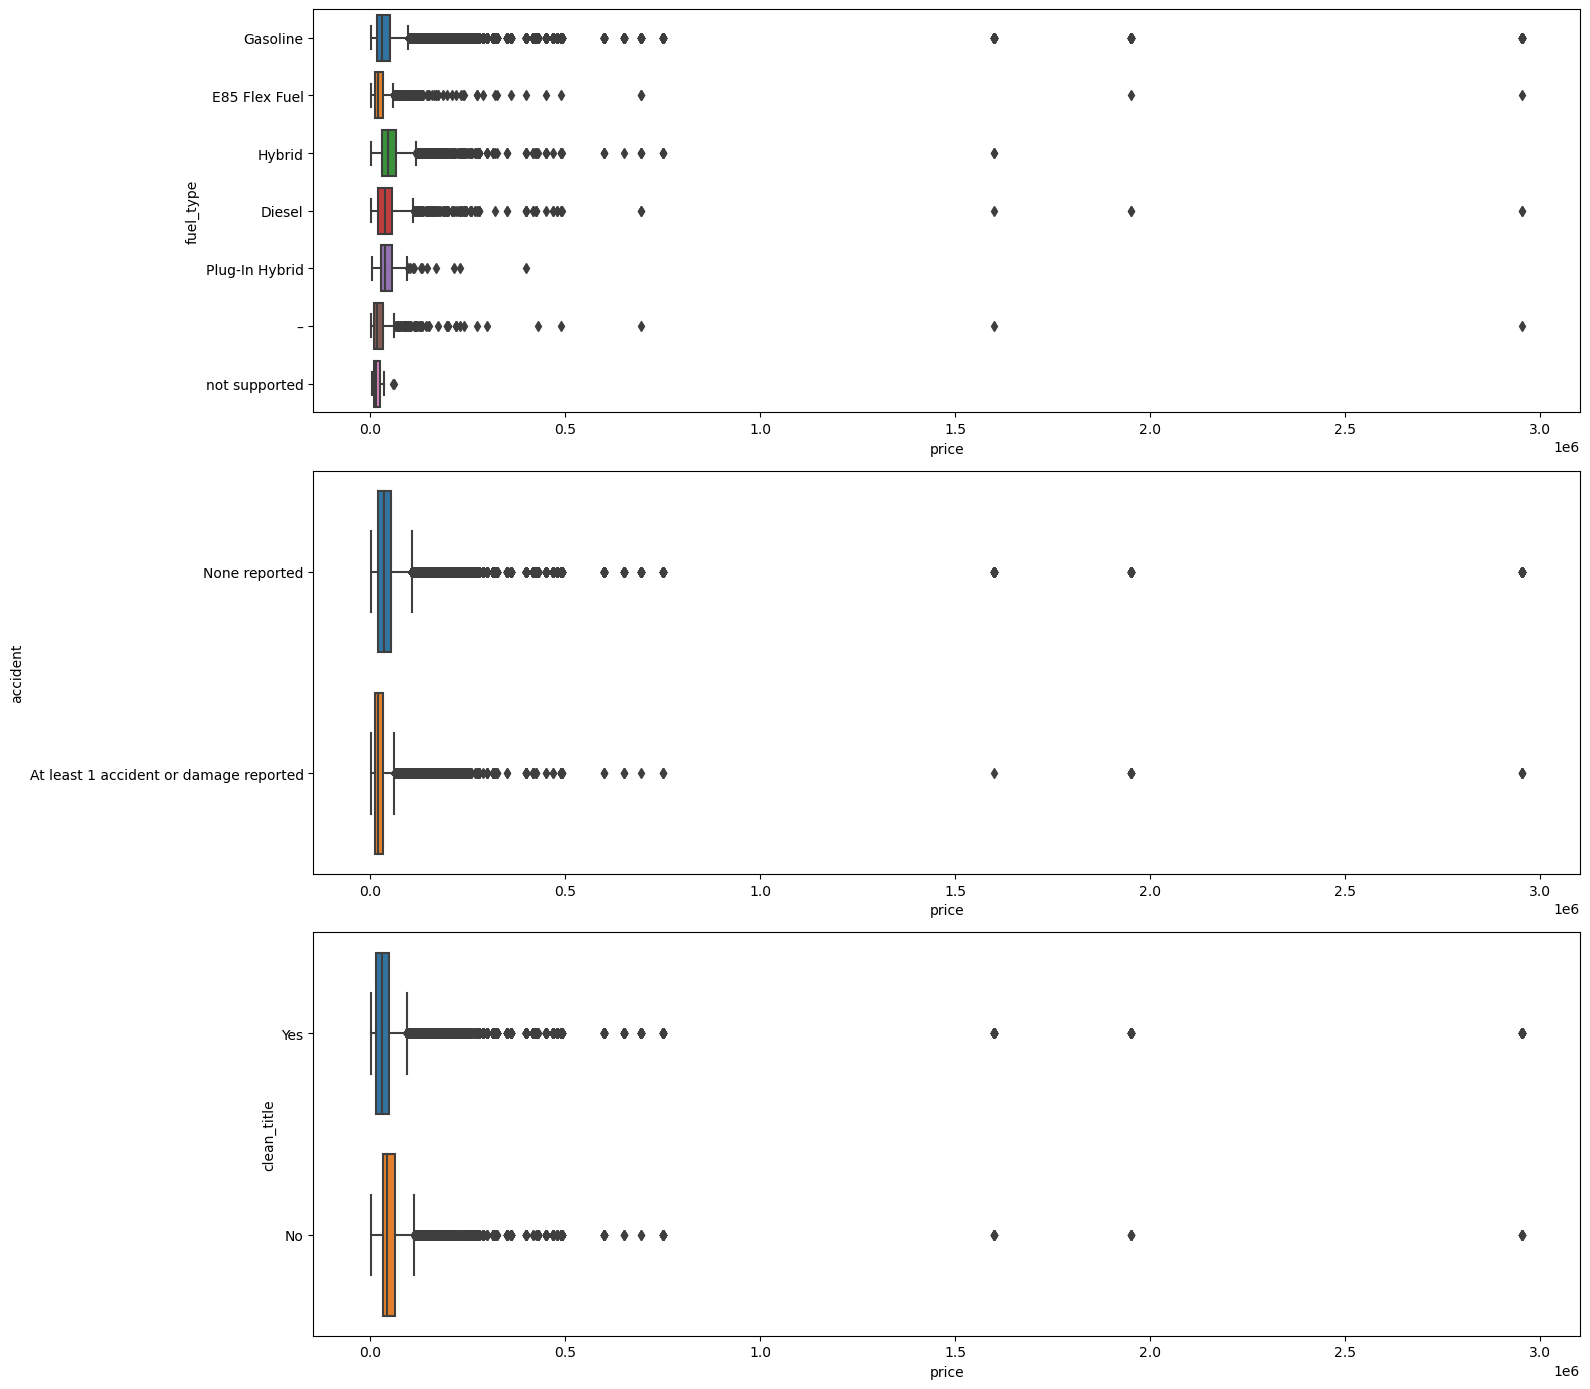

In [448]:
plt.figure(figsize=(16,14))
for i,col in enumerate(var_qual_low,1):
    plt.subplot(3,1,i)
    sns.boxplot(y=col, x = df.price, data = df[var_qual_low])
plt.tight_layout()

### Variables avec beaucoup de modalités :

In [35]:
#récupérons notre dictionnaire contenant les 15 modalités les plus présentes de chaque features : 
print(list(dict_val_count.keys()))

['brand', 'model', 'engine', 'transmission', 'ext_col', 'int_col']


Nous allons parcourir chaque clefs contenant ces modalités les plus présentes et créé autant de variable qu'il y a de clefs du dictionnaire afin d'obtenir des dataframe avec un nombre d'observation réduits


In [36]:
subdf_dict = {}
for i in dict_val_count:
    subdf_dict[i] = df.query(f"{i} in {dict_val_count[i].keys().tolist()}")

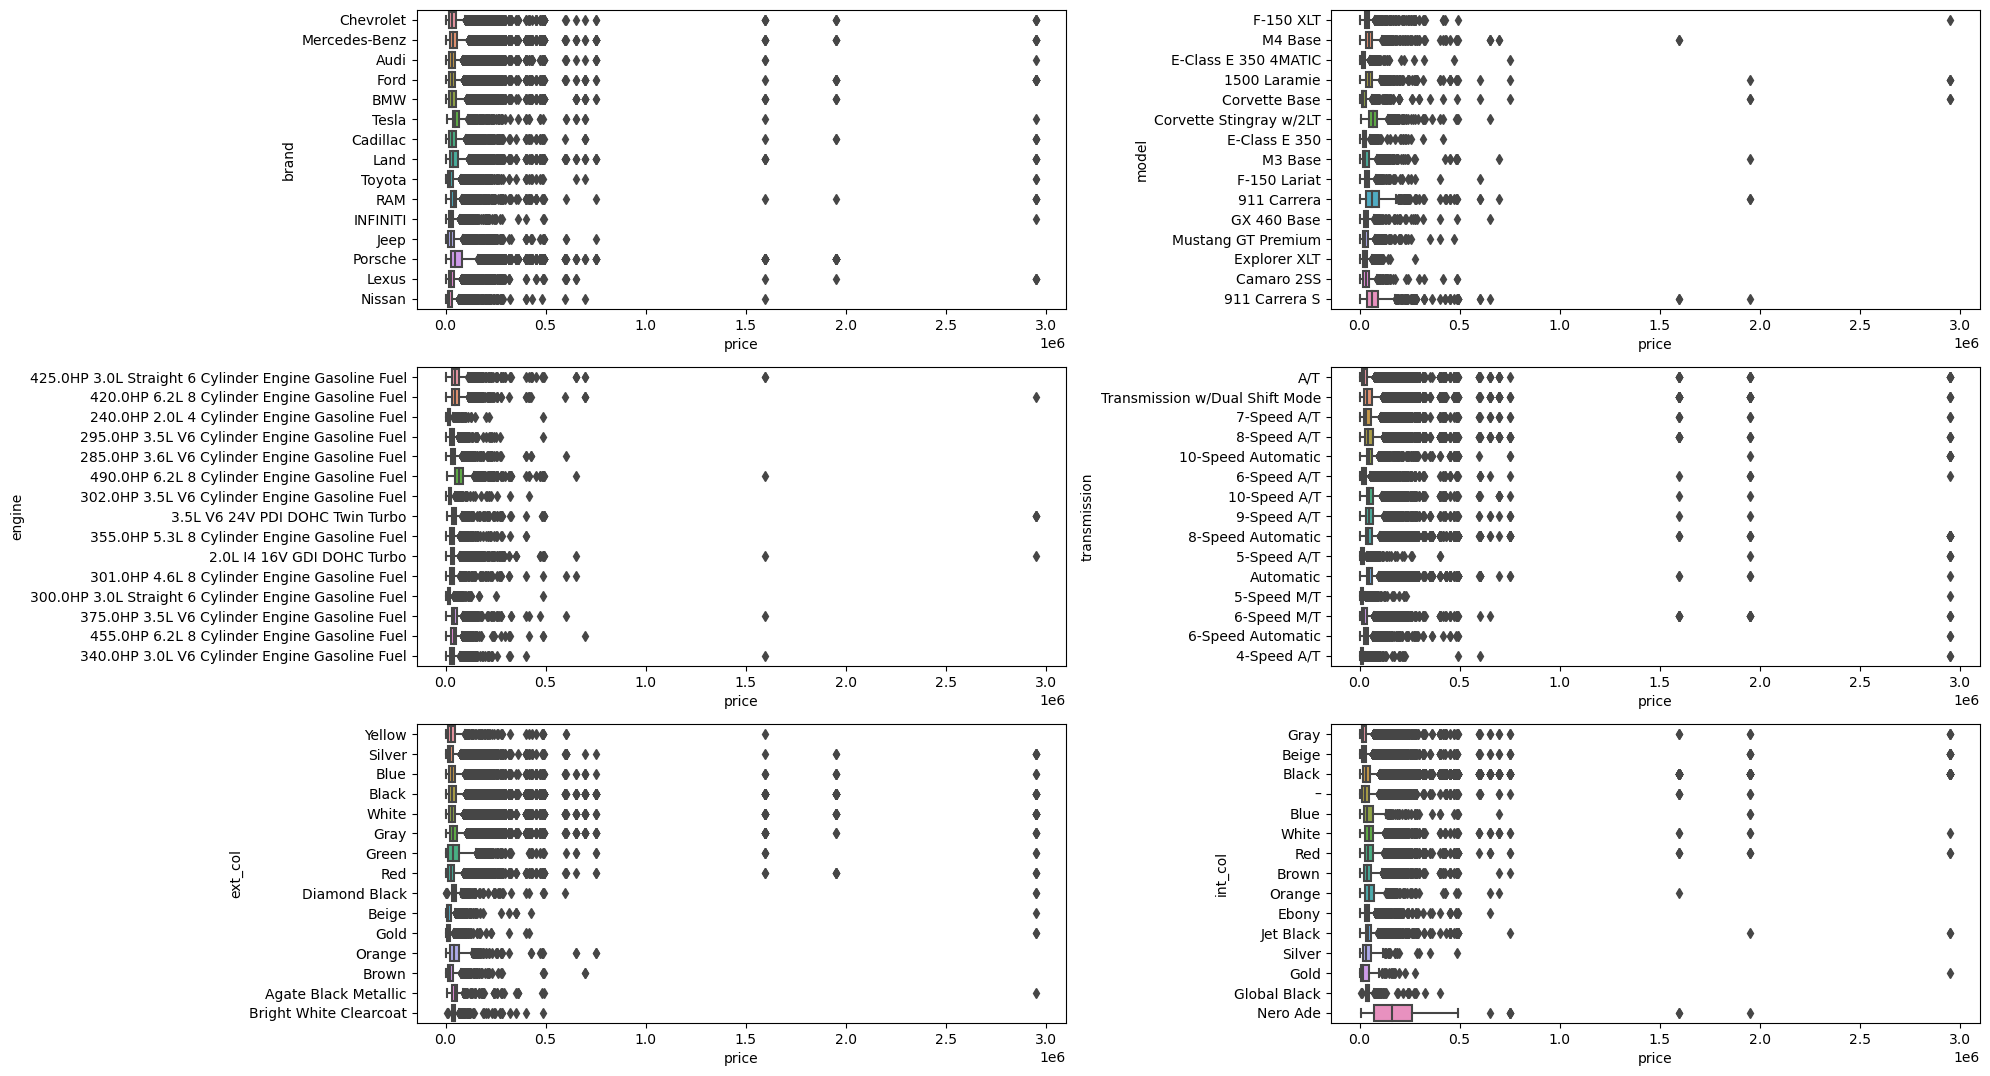

In [619]:
plt.figure(figsize=(20,14))
for i,col in enumerate(var_qual_high,1):
    plt.subplot(4,2,i)
    sns.boxplot(y=col, x = df.price, data = subdf_dict[col])
plt.tight_layout()

A cause de certains prix beaucoup trop élevé, la visualisation est compliquée, donc nous allons donc utiliser le **logarithme des prix** afin de faciliter celle-ci :

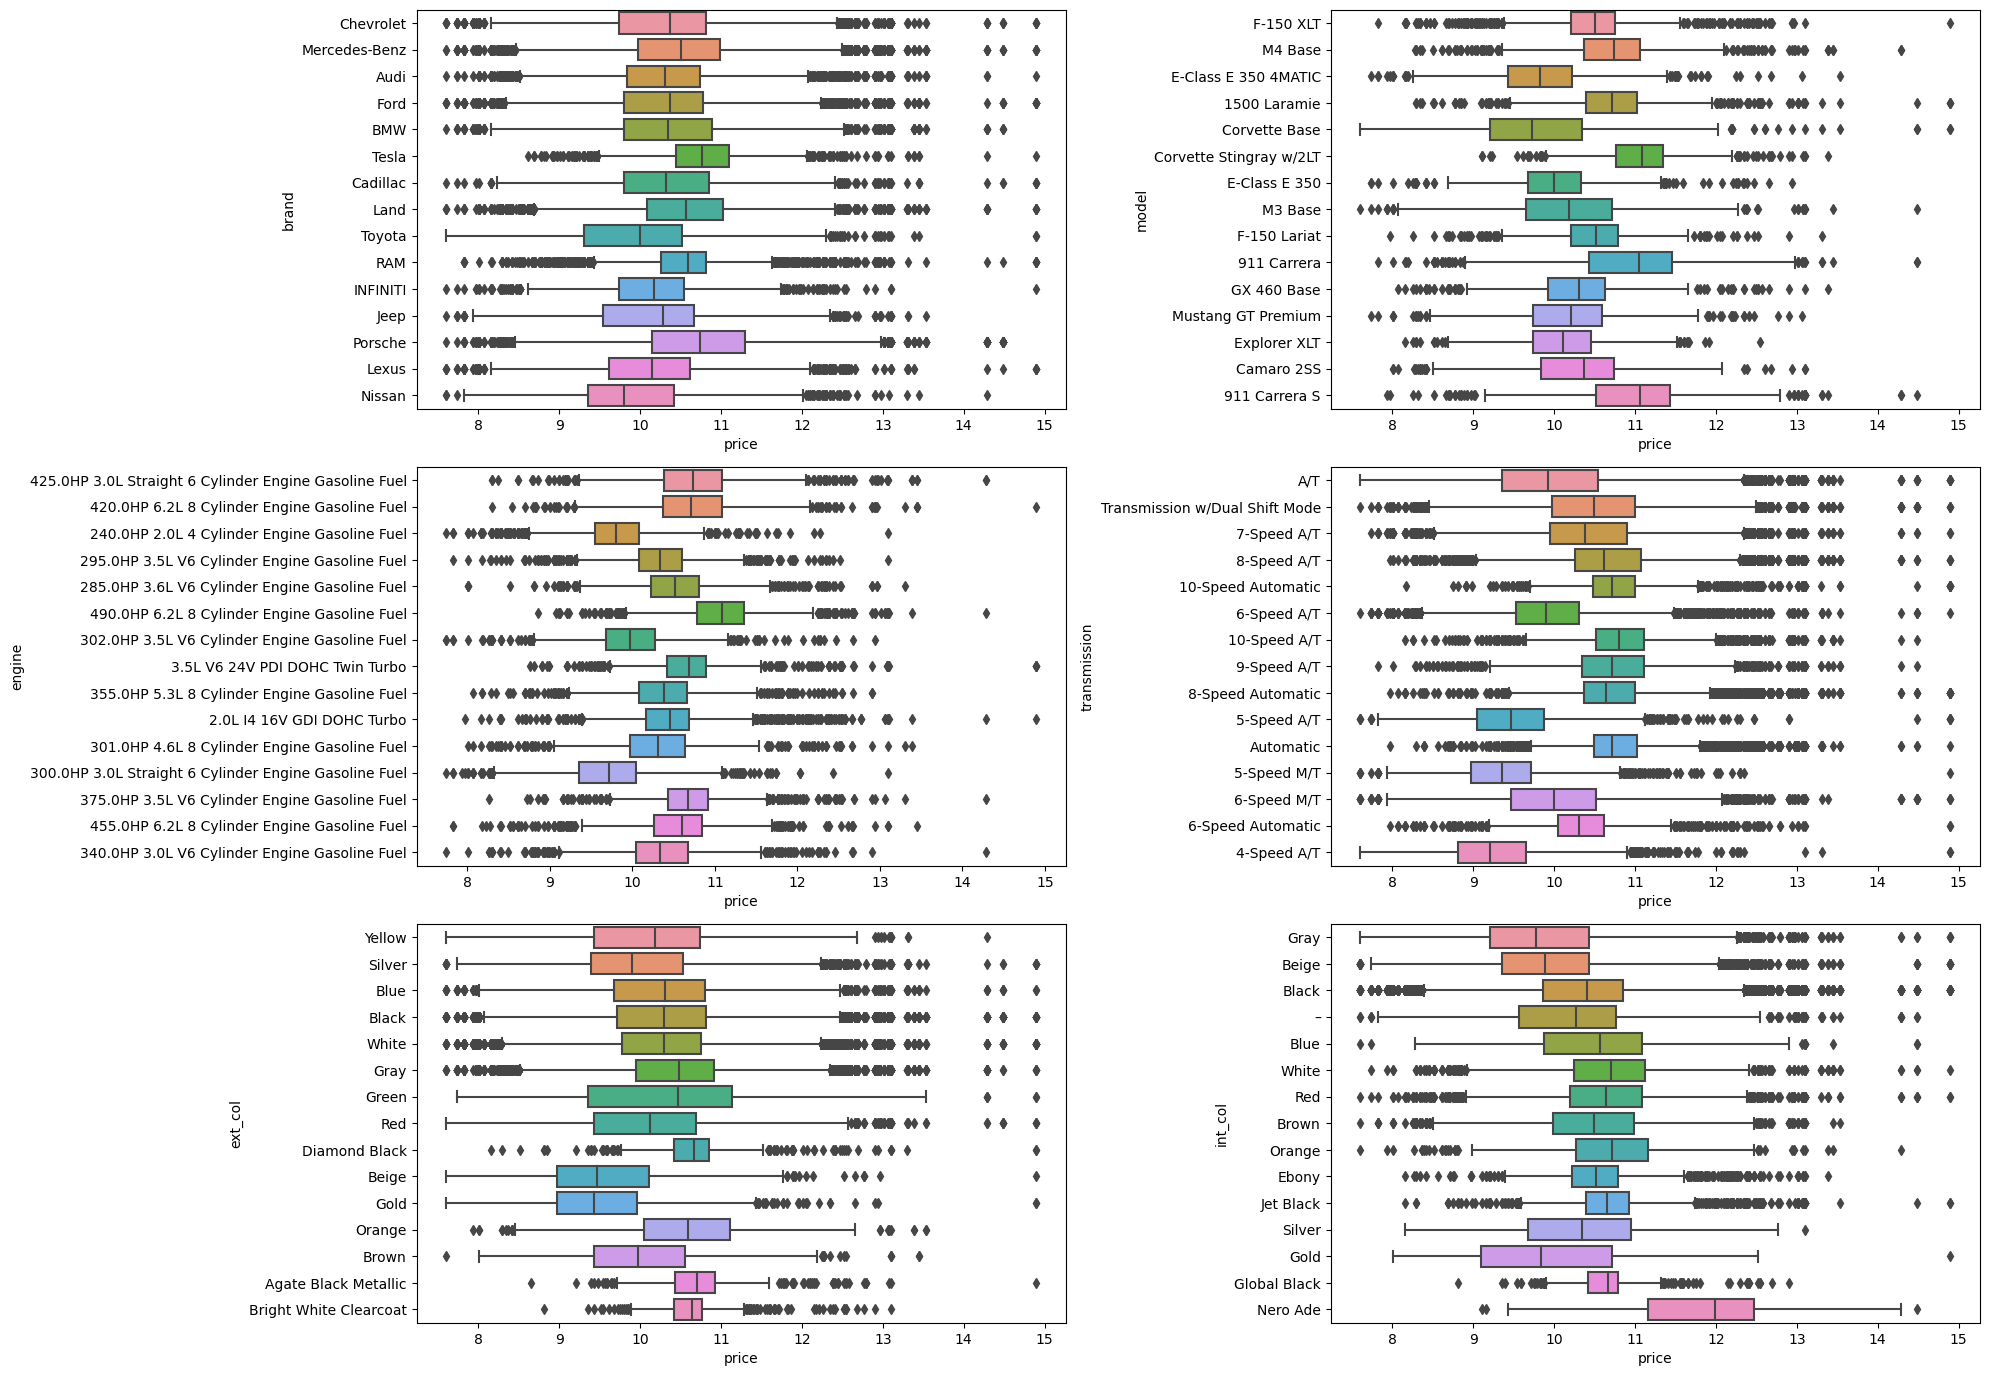

In [621]:
plt.figure(figsize=(20,18))
for i,col in enumerate(var_qual_high,1):
    plt.subplot(4,2,i)
    log_price = np.log(subdf_dict[col].price)
    sns.boxplot(y=col, x = log_price, data = subdf_dict[col])
plt.tight_layout()

### Observation
- nous voyons plus aisément les boxplot avec l'échelle logarithmique. 
- Pour chaque variable, on voit une variation du prix du véhicule en fonction de la modalité (couleur, modèle, marque etc)
- Il y a de forte chance de penser que chacune de ces variables est importante pour aider à prédire la target price, nous allons confirmer cela lors de la partie test statistiques

## Autre visualisation (multivariée, ..)

Analysons le prix des véhicule en fonction de certaines modalités


#### Prix moyen des 5 modèles les plus chères pour chaque marque des véhicules :

In [37]:
#récupération des
sorted_df = df[["brand","model","price"]].groupby(["brand","model"]).mean().sort_values(ascending=False, by ="brand")
sorted_df.head()

price
brand model                                                   
smart Nautilus Reserve                            84997.000000
      ForTwo Pure                                  9497.500000
Volvo Camaro 2SS                                  48500.000000
      S60 Recharge Plug-In Hybrid T8 Inscription  37349.444444
      S60 R                                       26443.513514

In [38]:
# Sélection des cinqs modèles avec le prix le plus élevé pour chaque marque
top_5_models_per_brand = sorted_df.groupby("brand", group_keys=False).apply(lambda x: x.nlargest(5, 'price'))

#group_keys = False permet de retirer une seconde fois l'indexiation par "brand", ou sinon on se retrouve avec
# un double index brand, pour tester la différence :

# top_5_models_per_brand = sorted_df.groupby("brand", group_keys=True).apply(lambda x: x.nlargest(5, 'price'))
top_5_models_per_brand.head(10)

price
brand model                                    
Acura Wagoneer Series II 4x4      259500.000000
      Corvette Stingray w/1LT     157500.000000
      Air Pure                     84995.000000
      RS Q8 4.0T                   80900.000000
      MDX w/Advance Package        63339.640000
Alfa  Romeo Giulia Quadrifoglio    74374.421053
      Romeo Giulia Ti              56859.681481
      Romeo Stelvio Quadrifoglio   48195.666667
      Romeo Stelvio Ti             47106.970588
      Romeo Stelvio Ti Sport       43153.629412

In [39]:
#Moyenne des 5 véhicules les plus chères pour chaque marque :
meantop5_price_brand = top_5_models_per_brand.reset_index()[["brand","price"]][["brand","price"]].groupby("brand").mean().sort_values(ascending=False,by="price")

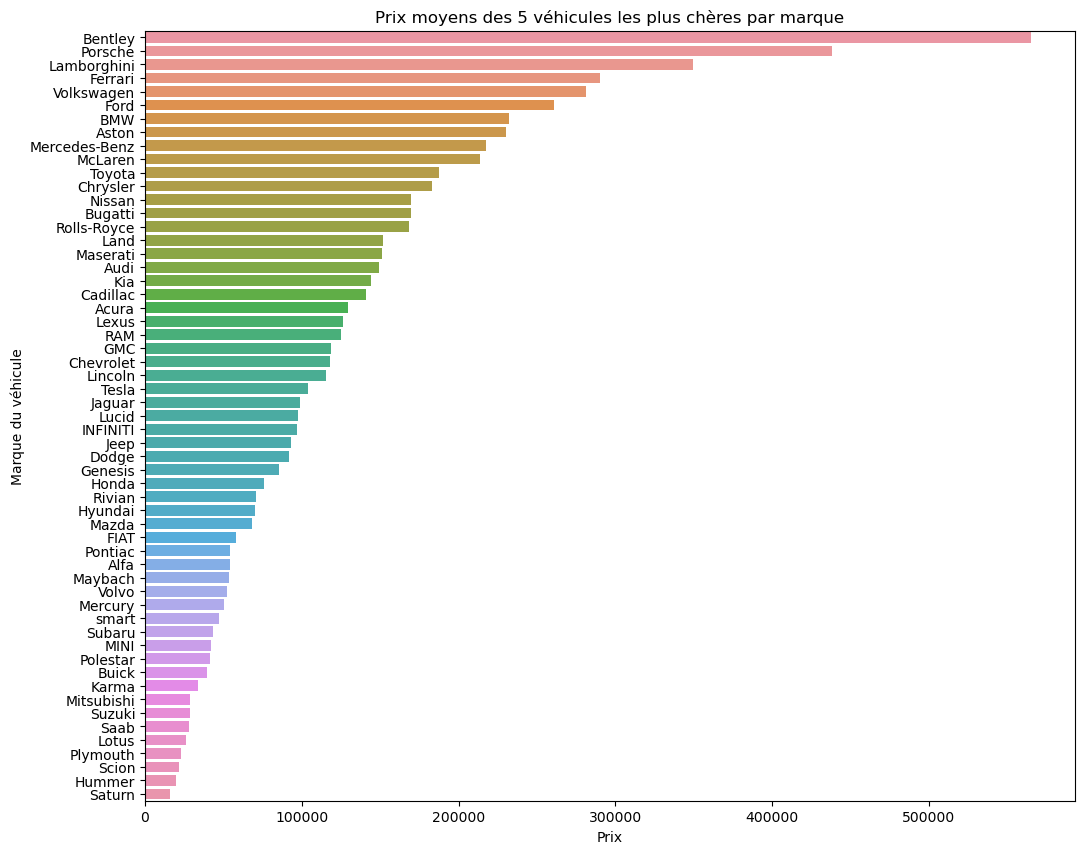

In [54]:
plt.figure(figsize=(12,10))
plt.title("Prix moyens des 5 véhicules les plus chères par marque")
sns.barplot(y=meantop5_price_brand.index,x="price",data=meantop5_price_brand)
plt.ylabel("Marque du véhicule")
plt.xlabel("Prix")
plt.show()

### Observation :
* on peut voir que les véhicules les plus chères sont sans surprise, les véhicules de luxe connus tel que bentley, ferrari, Porsche ou encore Lamborgini

#### Regardons le nombre d'accident en fonction de la marque et de la valeur du véhicule
- Pour cela nous allons agir en plusieurs étapes 

Tout d'abord recuperons les modèles de véhicules avec le recensement des accidents :

In [40]:
accident_counts = df.groupby('brand')[['accident']].value_counts().unstack().fillna(0)#fillna pour eviter un NaN si une combinaison
#n'existais pas, sans fillna, on aurait "Bugatti" n'a aucun "At least 1 accident or damage reported"
accident_counts.isnull().any()

accident
At least 1 accident or damage reported    False
None reported                             False
dtype: bool

In [41]:
# On met en int :
accident_counts = accident_counts.astype(int)

In [42]:
accident_counts.head()#ici nous avons le nombre d'accident en fonction de la marque du véhicule

accident,At least 1 accident or damage reported,None reported
brand,,
Acura,663,1619
Alfa,60,622
Aston,16,222
Audi,2546,8341
BMW,3398,13630


#### Ajoutons en plus le prix, ainsi nous pourrons regarder le nombre d'accident en fonction de la valeur du véhicule

In [43]:
#Fusionnons le dataframe ci-dessus avec notre dataframe contenant la moyenne des 5 véhicule les plus chere par marque
accident_count_price = pd.merge(left=accident_counts, right=meantop5_price_brand.round(2),
                                how="inner",left_on=accident_counts.index, right_on=meantop5_price_brand.index)
#on renomme la clef :
accident_count_price = accident_count_price.rename(columns={'key_0': 'brand'})
accident_count_price.head()

,brand,At least 1 accident or damage reported,None reported,price
0,Acura,663,1619,129246.93
1,Alfa,60,622,53938.07
2,Aston,16,222,230002.37
3,Audi,2546,8341,149340.30
4,BMW,3398,13630,231890.00


In [44]:
#avec melt nous allons remettre la colonne accident comme à l'origine, mais nous avons la colonne count en plus
#contenant le nombre d'accident ou non :
melt_accident_count_price = accident_count_price.melt(id_vars=['brand',"price"], 
                                  value_vars=['At least 1 accident or damage reported', 'None reported'],
                                  var_name='accident', value_name='count')
melt_accident_count_price.head()

,brand,price,accident,count
0,Acura,129246.93,At least 1 accident or damage reported,663
1,Alfa,53938.07,At least 1 accident or damage reported,60
2,Aston,230002.37,At least 1 accident or damage reported,16
3,Audi,149340.30,At least 1 accident or damage reported,2546
4,BMW,231890.00,At least 1 accident or damage reported,3398


In [45]:
#Trions le tableau par prix décroissant :
merged_df_sorted = melt_accident_count_price.sort_values(by='price', ascending=False)

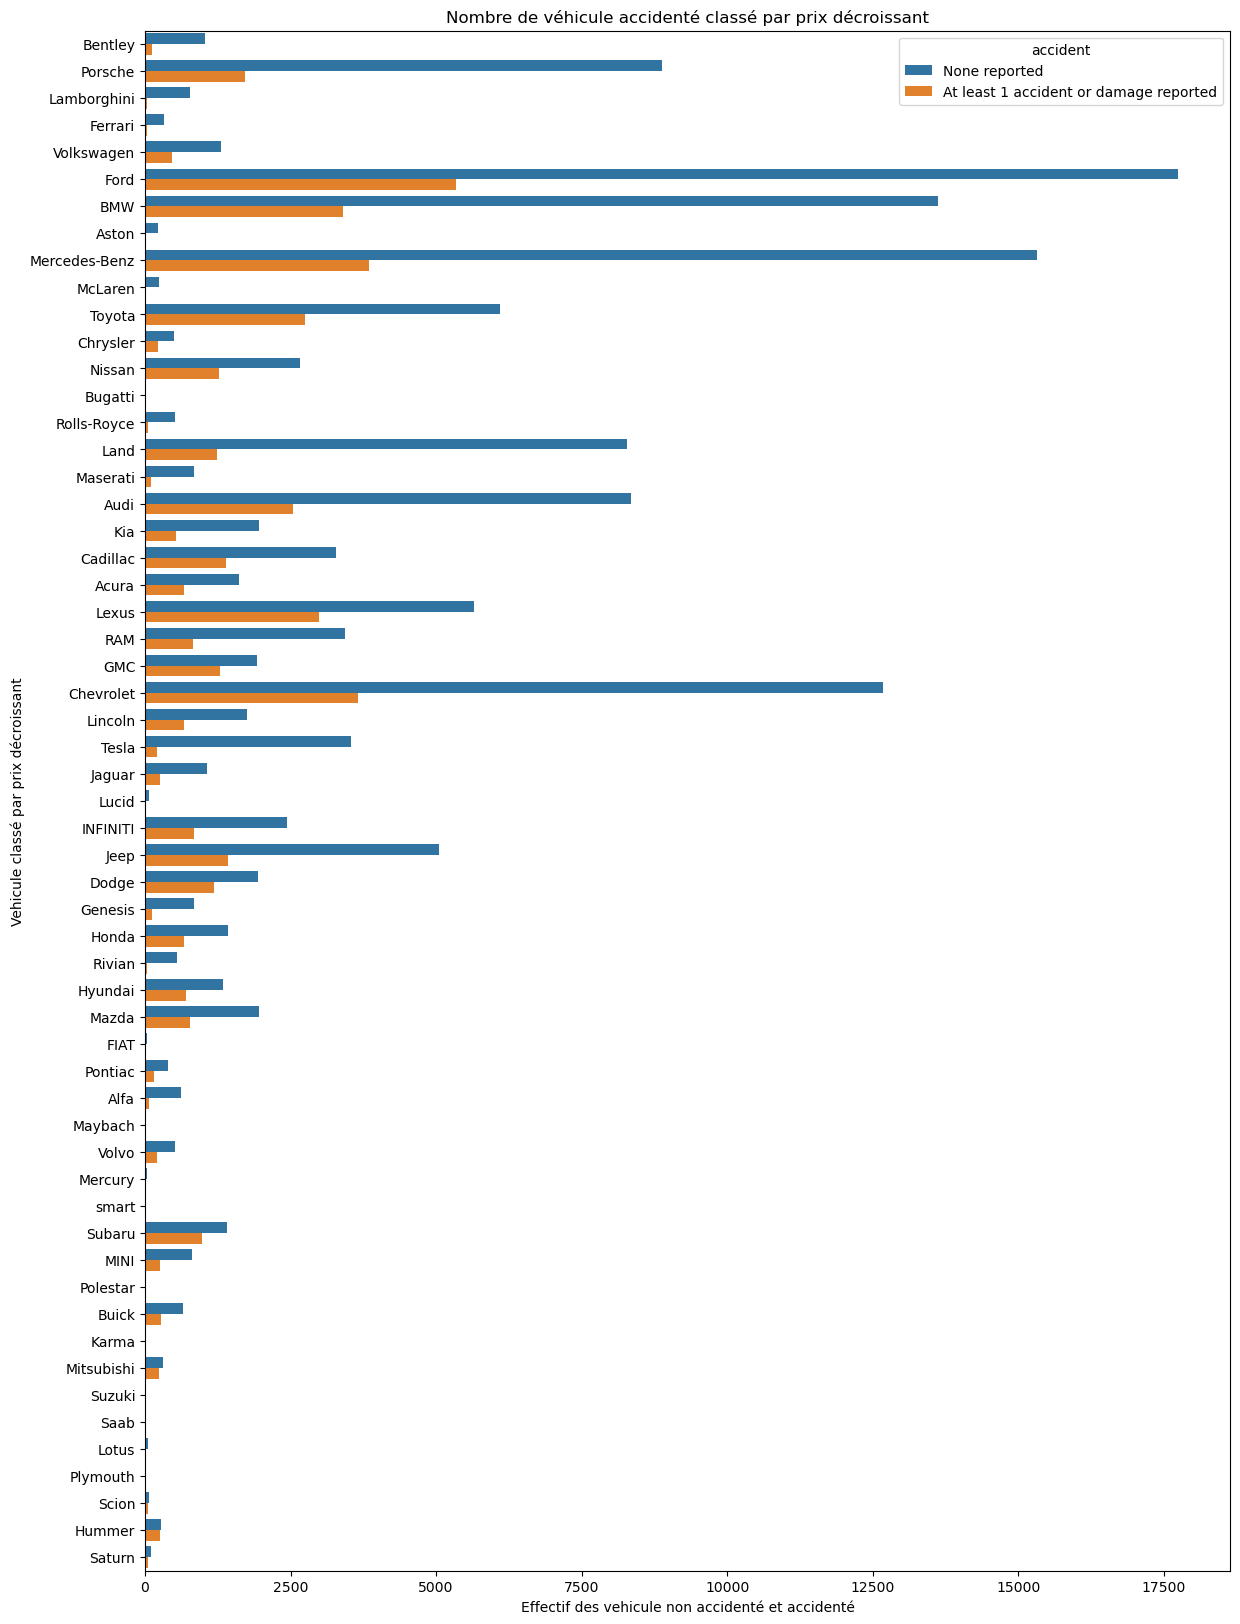

In [929]:
plt.figure(figsize=(14,20))
ax=sns.barplot(y="brand", x="count", hue = "accident", data = merged_df_sorted)
plt.ylabel("Vehicule classé par prix décroissant")
plt.xlabel("Effectif des vehicule non accidenté et accidenté")
plt.title("Nombre de véhicule accidenté classé par prix décroissant")
# ax.set_xticklabels(rotation=90,labels=ax.get_xticklabels())
plt.show()

### Observation : 
- On peut voir que ce n'est pas forcément les véhicules au prix les plus élevés qui sont sujet au moins d'accident
- Par exemple, on voit que les véhicules ford sont ceux à la fois les véhicules qui ont le plus d'accident, mais aussi  ceux qui en ont le molns
# 3. Test statistique :
- Target vs variable continues : Test de Kendall (données ne suivent pas de loi normale)

In [46]:
col_kendal = ["model_year","milage"]

In [47]:
def kendall(features, target,dataframe,retour=False):
    """
    Fonction qui effectue un test de Man Withney entre une variable qualitative et une variable continue
    features : liste de feature ou feature unique
    target : nom de la target
    dataframe : jeu de donnée contenant les features et la target
    renvoi un tuple de liste, le premier élément du tuple sont les variables à conserver, le second les variables à
    supprimer
    """
    var_a_conserver, var_a_supprimer = [],[]
    #si l'utilisateur n'entre qu'une seule feature, on la met en liste :
    if type(features) == str:
        features = [features]
    print(colored("P-values :","blue")) 
    print()

    
    #test correlation : 
    for feat in features:
        stat, pval = kendalltau(dataframe[feat],dataframe[target]) #test kendall
        alpha = 0.05
        if pval<alpha:
            print(f'{colored(feat,"green")} : {pval}')
            var_a_conserver.append(feat)
        else:
            print(f'{colored(feat,"red")} : {pval}')

            var_a_supprimer.append(feat)
    print()        
    print(colored("Variable a conserver ","green", attrs=["bold"]), var_a_conserver)
    print(colored("Variable a supprimer ","red", attrs=["bold"]), var_a_supprimer)
    if retour :
        return var_a_conserver, var_a_supprimer
        

In [48]:
kendall(col_kendal, "price",df)

P-values :

model_year : 0.0
milage : 0.0

Variable a conserver  ['model_year', 'milage']
Variable a supprimer  []


- Target vs variable qualitatives :
    * Features avec deux modalités : test de Man whitney
    * features ayant plus de deux modalités : test de kruskal wallis

In [49]:
col_manwhitney = df[var_qual].nunique()[df[var_qual].nunique() == 2].keys().tolist()
col_kruskal = df[var_qual].nunique()[df[var_qual].nunique() > 2].keys().tolist() 

In [51]:
def manwithney(features, target,dataframe,retour=False):
    """
    Fonction qui effectue un test de Man Withney entre une variable qualitative et une variable continue
    features : liste de feature ou feature unique
    target : nom de la target
    dataframe : jeu de donnée contenant les features et la target
    renvoi un tuple de liste, le premier élément du tuple sont les variables à conserver, le second les variables à
    supprimer
    """
    var_a_conserver, var_a_supprimer = [],[]
    #si l'utilisateur n'entre qu'une seule feature, on la met en liste :
    if type(features) == str:
        features = [features]
    print(colored("P-values :","blue")) 
    print()

    #test correlation : 
    for feat in features:
            # Séparation en deux groupes basés sur la variable qualitative
        group1 = dataframe[dataframe[feat] == dataframe[feat].unique()[0]][target]
        group2 = dataframe[dataframe[feat] == dataframe[feat].unique()[1]][target]
            
        # test de Mann-Whitney
        stat, pval = mannwhitneyu(group1, group2)
        alpha = 0.05
        if pval<alpha:
            print(f'{colored(feat,"green")} : {pval}')
            var_a_conserver.append(feat)
        else:
            print(f'{colored(feat,"red")} : {pval}')

            var_a_supprimer.append(feat)
    print()        
    print(colored("Variable a conserver ","green", attrs=["bold"]), var_a_conserver)
    print(colored("Variable a supprimer ","red", attrs=["bold"]), var_a_supprimer)
    if retour:
        return var_a_conserver, var_a_supprimer

In [52]:
manwithney(col_manwhitney, "price",df)

P-values :

accident : 0.0
clean_title : 1.1717570785155878e-47

Variable a conserver  ['accident', 'clean_title']
Variable a supprimer  []


In [53]:
def kruskal_wallis(feature, target, dataframe,retour=False):
    var_a_conserver = []
    var_a_supprimer = []

    # Test si la feature est une liste ou simplement une feature
    if type(feature) == str:
        feature = [feature]

    for feat in feature:
        # Séparer les données en fonction des différentes valeurs prises par la variable qualitatives
        grouped_data = [dataframe.loc[dataframe[target] == category, feat] for category in dataframe[target].unique()]

        # Effectuer le test de Kruskal-Wallis
        statistic, pval = kruskal(*grouped_data)

        # Interpréter les résultats
        alpha = 0.05  # Niveau de signification
        if pval<alpha:
            print(f'{colored(feat,"green")} : {pval}')
            var_a_conserver.append(feat)
        else:
            print(f'{colored(feat,"red")} : {pval}')

            var_a_supprimer.append(feat)
    print()        
    print(colored("Variable a conserver ","green", attrs=["bold"]), var_a_conserver)
    print(colored("Variable a supprimer ","red", attrs=["bold"]), var_a_supprimer)
    if retour :
        return var_a_conserver, var_a_supprimer

In [54]:
kruskal_wallis(col_kruskal, "price",df)

brand : 1.2177507774293795e-74
model : 8.653359835106156e-113
fuel_type : 0.0
engine : 0.0
transmission : 0.0
ext_col : 3.331233151387549e-63
int_col : 0.0

Variable a conserver  ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col']
Variable a supprimer  []


# Bilan : 
- les tests statistiques nous indique que nous pouvons conserver l'ensemble des features
- dans le prochain notebook nous ferons le preprocessing ainsi que la modélisation

# 4. Preprocessing : Standardisation et encodage
### Sur le train : 
- Standardisation
- Encodage
- Enregistrement DF :


#### Standardisation :

In [ ]:
#retirons la target de la variable var_cont : 
var_cont.remove("price")

In [1316]:
scaler = StandardScaler()
scaler.fit(df[var_cont]) #entrainement
df[var_cont] = scaler.transform(df[var_cont]) #transformation

#### note du 25/03/25 : 
- au dessus j'aurai du fit sur split le df et faire :
    - scaler.fit(X_train[var_cont])
    - scaler.transform(X[var_cont])

#### Encodage: 

In [1324]:
# Initialisation de l'OrdinalEncoder avec la gestion des valeurs inconnues
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Encodage des données d'entraînement
df_encoded = encoder.fit_transform(df[var_qual])
df_encoded= pd.DataFrame(df_encoded, columns=var_qual) #remettre en dataframe
df_encoded = df_encoded.astype(int) #remettre au format int 

In [1348]:
#supression des colonnes var_qual non encodé pour y mettre les nouvelles :
df=df.drop(columns=var_qual,axis=1)

In [1350]:
#Fusion du df de base avec les nouvelles colonnnes encodées : 
df = pd.concat([df,df_encoded],axis=1)

- Aperçu du dataframe final : 

In [1351]:
df.head()

,id,model_year,milage,price,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,0,-1.559808,2.957842,4200,31,495,2,116,38,312,71,1,1
1,1,-2.443052,1.557184,4999,28,930,2,366,38,263,10,0,1
2,2,-2.443052,1.426276,13900,9,1575,1,640,38,38,71,1,1
3,3,0.206679,-0.927854,45000,16,758,2,863,49,29,14,1,1
4,4,0.913274,-1.171076,97500,36,1077,2,259,23,29,10,1,1


Les données sont prêtes à passer à la modélisation, nous allons enregistrer le dataframe et nous occuper du jeu de données test

#### Enregistrement DF :

In [1352]:
df.to_csv("preprocessed_df.csv")

# Sur le test :
- imputation
- Encodage 
- Standardisation 
- Enregistrement du dataframe


#### imputation
- Nous allons traiter les données manquantes du test set 

In [1369]:
test = pd.read_csv(path_dataset+"test.csv")

In [1370]:
test.isnull().sum()[test.isnull().sum()>0]

fuel_type       3383
accident        1632
clean_title    14239
dtype: int64

In [1371]:
# fuel_type : 
test[["fuel_type"]] = imputer.transform(test[["fuel_type"]])

In [1372]:
test.isnull().sum()[test.isnull().sum()>0]

accident        1632
clean_title    14239
dtype: int64

In [1373]:
# accident & clean_title :

#utilisons notre fonction créé précédemment :
test = imputer_accident_title(test)

In [1374]:
test.isnull().sum()[test.isnull().sum()>0]

Series([], dtype: int64)

#### Encodage :

In [1375]:
# On convertie les colonnes var_qual en type 'object' (str) pour éviter des erreurs d'encodage
test[var_qual] = test[var_qual].astype(str) 

In [1376]:
test_encoded = pd.DataFrame(encoder.transform(test[var_qual]),columns=var_qual)

In [1379]:
test = test.drop(columns=var_qual, axis = 1)

In [1381]:
test = pd.concat([test, test_encoded],axis=1)
test.head(3)

,id,model_year,milage,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,2015,98000,26.0,1390.0,2.0,325.0,16.0,304.0,10.0,1.0,1.0
1,188534,2020,9142,26.0,1377.0,3.0,787.0,31.0,263.0,14.0,1.0,1.0
2,188535,2022,28121,14.0,636.0,2.0,540.0,3.0,304.0,57.0,1.0,1.0


#### Standardisation :

In [1384]:
test[var_cont] = scaler.transform(test[var_cont])

- Aperçu et Enregistrement du test set après preprocessing : 

In [1385]:
test.head()

,id,model_year,milage,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,-0.146618,0.648514,26.0,1390.0,2.0,325.0,16.0,304.0,10.0,1.0,1.0
1,188534,0.736626,-1.135854,26.0,1377.0,3.0,787.0,31.0,263.0,14.0,1.0,1.0
2,188535,1.089923,-0.754735,14.0,636.0,2.0,540.0,3.0,304.0,57.0,1.0,1.0
3,188536,0.030031,-0.089307,3.0,182.0,2.0,192.0,39.0,261.0,14.0,1.0,1.0
4,188537,0.383328,-0.134650,3.0,181.0,2.0,364.0,38.0,128.0,14.0,1.0,1.0


#### Enregistrement :

In [1388]:
test.to_csv("preprocessed_test.csv")